# This notebook is prepared by ApplAi's Technical And Training Depratment. 
- Please Don't use it outside the training without asking for permission as it's considered as Violation of Intellectual property rights

![ApplAi's Logo](https://media-exp1.licdn.com/dms/image/C4E0BAQHGLGltI2rzuQ/company-logo_200_200/0?e=2159024400&v=beta&t=adq8rNV09dPC6egdJMnfARt6Aq0TC9bSomFvFtm50WM)

### Task 1: Importing libraries and Exploring the Dataset.

### Task 2: Definining Exploratory Data Analysis with an overview of the whole project .

### Task 3: Checking missing values and Outliers & Creating visual methods to analyze the data.

### Task 4: creat a model that fits the data

### Task 5: creating an accurecy table


### 

### Task 1: Importing libraries and Exploring the Dataset.

In [180]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


### Task 2: Definining Exploratory Data Analysis with an overview of the whole project 

In [140]:
df =pd.read_csv('heart - heart.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [141]:
list=[]
for i in df.columns:
    if df[i].max()>10:
        print(i)
        list.append(i)


age
trestbps
chol
thalach


In [142]:
for i in list:
    df[i]=df[i].apply(lambda x: (x-df[i].min())/df[i].max())

df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.441558,1,3,0.255,0.189716,1,0,0.391089,0,2.3,0,0,1,1
1,0.103896,1,2,0.180,0.219858,0,1,0.574257,0,3.5,0,0,2,1
2,0.155844,0,1,0.180,0.138298,0,0,0.500000,0,1.4,2,0,2,1
3,0.350649,1,1,0.130,0.195035,0,1,0.529703,0,0.8,2,0,2,1
4,0.363636,0,0,0.130,0.404255,0,1,0.455446,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.363636,0,0,0.230,0.203901,0,1,0.257426,1,0.2,1,0,3,0
299,0.207792,1,3,0.080,0.244681,0,1,0.301980,0,1.2,1,0,3,0
300,0.506494,1,0,0.250,0.118794,1,1,0.346535,0,3.4,1,2,3,0
301,0.363636,1,0,0.180,0.008865,0,1,0.217822,1,1.2,1,1,3,0


### Task 3: Checking missing values and Outliers & Creating visual methods to analyze the data.

<AxesSubplot:>

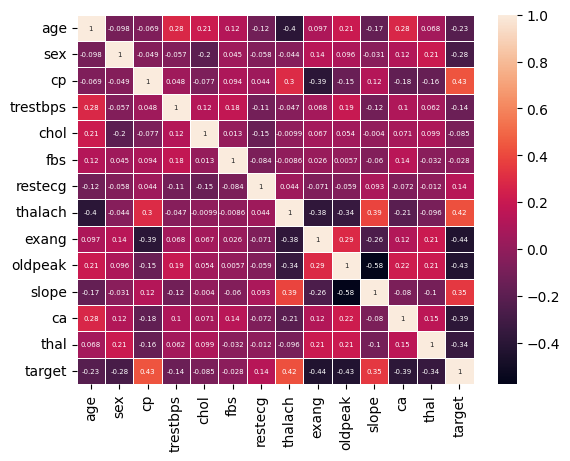

In [134]:
sns.heatmap(df.corr(), annot=True ,linewidth=0.5,annot_kws={'size':5})


In [251]:
models ={}


### Task 4: creat a model that fits the data

In [303]:
X= df.iloc[:,:-1]
Y= df.iloc[:,-1]

models ={}

x_train ,x_test,y_train,y_test= train_test_split(X,Y,test_size=1/5,random_state=0)

model= LogisticRegression()
model.fit(x_train,y_train)
y_pred= model.predict(x_test)

Logistic_accuray=accuracy_score(y_pred=y_pred,y_true=y_test)


### Task 5: creating an accurecy table

In [304]:
models['Losistic Model']=Logistic_accuray*100


In [305]:
from sklearn.metrics import classification_report

report= classification_report(y_pred,y_test)
print (report)

              precision    recall  f1-score   support

           0       0.78      0.88      0.82        24
           1       0.91      0.84      0.87        37

    accuracy                           0.85        61
   macro avg       0.84      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



In [306]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
KNN_pred=knn.predict(x_test)

KNN_accuray=accuracy_score(y_pred=KNN_pred,y_true=y_test)

models['KNN Model']=KNN_accuray*100



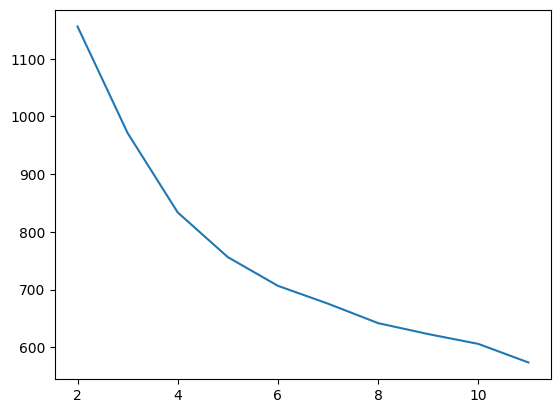

In [307]:
from sklearn.cluster import KMeans

K=range(2,12)
wss=[]
for k in K:
    kmeans = KMeans(n_clusters=k, init='random', max_iter=300,random_state=0)
    kmeans.fit(X)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)
plt.plot(K,wss)


In [308]:
kmeans= KMeans(n_clusters=2,random_state=0)
means_pred= kmeans.fit_predict(X)
# can't draw because it's more than 2 dimensions
Kmeans_accracy =accuracy_score(y_pred=means_pred,y_true=Y)

models['Kmeans Model']=Kmeans_accracy*100



In [309]:
from sklearn.cluster import DBSCAN

DBSCAN_pred=DBSCAN(eps=2 , min_samples=5).fit_predict(X)
# can't draw because it's more than 2 dimensions
DBSCAN_accuracy=accuracy_score(y_pred=DBSCAN_pred,y_true=Y)
models['DBSCAN Model']=DBSCAN_accuracy*100



In [332]:
from sklearn import svm

C = 0.5  # SVM regularization parameter
Poly_SVC_Model = svm.SVC(kernel='poly', degree=2, C=C).fit(x_train, y_train)
prediction = Poly_SVC_Model.predict(x_test)
svm_accuracy=accuracy_score(y_test, prediction)
models['SVM Model']=svm_accuracy*100



['SVM Model', 'Losistic Model', 'Kmeans Model', 'KNN Model', 'DBSCAN Model']

In [331]:
for i in M:
   print('The accuracy of {} is : {:.2f}'.format(i,models[i])) 

The accuracy of SVM Model is : 86.89
The accuracy of Losistic Model is : 85.25
The accuracy of Kmeans Model is : 79.54
The accuracy of KNN Model is : 86.89
The accuracy of DBSCAN Model is : 43.89


In [312]:
#so the best model that fitted in our heart desease dataset is (KNN Model and SVM model)with the same accuracy
# followed by Logistic regression.
